         a      b      c      d       e      f  O
0    63.03  22.55  39.61  40.48   98.67  -0.25  1
1    39.06  10.06  25.02  29.00  114.41   4.56  1
2    68.83  22.22  50.09  46.61  105.99  -3.53  1
3    69.30  24.65  44.31  44.64  101.87  11.21  1
4    49.71   9.65  28.32  40.06  108.17   7.92  1
..     ...    ...    ...    ...     ...    ... ..
205  67.29  16.72  51.00  50.57  137.59   4.96  0
206  51.33  13.63  33.26  37.69  131.31   1.79  0
207  65.76  13.21  44.00  52.55  129.39  -1.98  0
208  40.41  -1.33  30.98  41.74  119.34  -6.17  0
209  48.80  18.02  52.00  30.78  139.15  10.44  0

[210 rows x 7 columns]
        a      b       c      d       e       f  O
0   69.56  15.40   74.44  54.16  105.07   29.70  1
1   89.50  48.90   72.00  40.60  134.63  118.35  1
2   85.29  18.28  100.74  67.01  110.66   58.88  1
3   60.63  20.60   64.54  40.03  117.23  104.86  1
4   60.04  14.31   58.04  45.73  105.13   30.41  1
..    ...    ...     ...    ...     ...     ... ..
95  47.90  13.62   

'\n\nObviously N being higher gives smallest error for k=6\nSimilar plots can be made on the same graph for different k values to obtain the best\noverall "k", i.e. k that is the closest to the x-axis and has smaller overall errors over\nN\'s entire range.\n\nAlso for each N, an optimal value for the k=k* can be obtained for the same graph, where\nall k\'s are plotted for their Test Errors against the entire N range.\n\nAdditionally from the exported .csv files, we can also obtain the various\nrelevant information for k and N selection. Those .csv files contain all the test and training\nerrors for all the k and N values for this dataset.\n\nSimilar procedures can be done in combination with Training Errors or for Training errors\nindividually also, using the test_1 and train_1 datasets.\n\n'

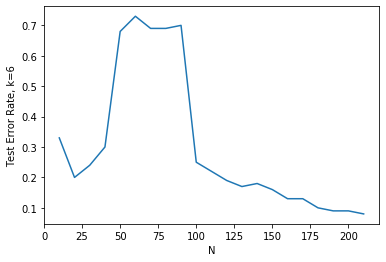

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 18 19:52:20 2020

@author: DHRUV
"""
"""
HW1 c(iii)

"""
"""
Assumptions
We assume that despite the reduction in training data, each training data is absolute
i.e. once it is shortened the remanant data won't be added to the test data set.
 
"""
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as lrn
from sklearn.neighbors import KNeighborsClassifier

df_train=pd.read_csv('TrainingData.csv',index_col=0)
print(df_train)

df_test=pd.read_csv('TestData.csv',index_col=0)
print(df_test)
test_compare = df_test['O'].to_numpy()
train_compare_interim = df_train['O'].to_numpy()
column_names = ['a','b','c','d','e','f','O']

N=np.arange(10,211,10)
print(N)

test_error = np.zeros((21,42))
training_error = np.zeros((21,42))



size=np.size(N)
print(size)
ind=np.arange(size)

for i in ind:
    a=math.floor(N[i]/3)
    b=N[i]-a
    df_training_modified = pd.DataFrame(columns=column_names,index=np.arange(N[i]))
    train_compare1=train_compare_interim[0:b]
    train_compare2=train_compare_interim[140:a+140]
    train_compare = np.concatenate((train_compare1,train_compare2),axis=None)
    l=np.arange(a)
    m=np.arange(b)
    j=0
    t=0
    for j in m:
        df_training_modified.loc[j]=df_train.loc[j]
    for t in l:
        df_training_modified.loc[t+b]=df_train.loc[140+t]
    
    X=df_training_modified.drop(columns=['O'])
    y=df_training_modified['O']
    y=y.astype('int')
    
    
    k = np.arange(1,N[i]+1,5)
    size_k = np.size(k)
    ind_k = np.arange(size_k)
    for q in ind_k:
        knn = KNeighborsClassifier(n_neighbors=k[q],weights='uniform',algorithm='auto',metric='minkowski',p=2)
        knn.fit(X,y)
        test_prediction = knn.predict(df_test.drop(columns=['O']))
        training_prediction = knn.predict(df_training_modified.drop(columns=['O']))
        testing=np.arange(100)
        training = np.arange(N[i])
        alpha = 0
        beta = 0
        test_interim = 0
        train_interim = 0
        for alpha in testing:
            if test_compare[alpha] != test_prediction[alpha]:
                test_interim = test_interim + 1
        
        for beta in training:
            if train_compare[beta] != training_prediction[beta]:
                train_interim = train_interim + 1
        
        test_error[i][q]=test_interim/100
        training_error[i][q]=train_interim/N[i]
    

print(test_error)
print(training_error)

"""
converting test_error and training_error into dataframes with more
relevant indexing

"""

mega_k = np.arange(1,211,5)

test_1 = pd.DataFrame(data=test_error, index=N,columns=mega_k)
train_1 = pd.DataFrame(data=training_error, index=N,columns=mega_k)

print(test_1)
print(train_1)

test_1.to_csv('Test_1.csv')            
train_1.to_csv('Train_1.csv')                

"""
The row index of both test_1 and train_1 corresponds to the N value.
The column index to the k value.
As k changes for each N, this matrix, which was defined from a zero matrix, is obviously sparse.
Thus 0 values don't, in the dataframe, mean that the actual errors were zero, they
simply imply that k for that N was not defined and thus a zero initial entry was not
filled up.

Obviously training error is 0 for k=1, irrespective of N. For each N, k is only 
obviously defined at the very most equal to that value of N, and so entries where we have 0
and k>N were zero because of "non-existence"

0 values for k<=n undoubtedly imply that the error, in fact, was obtained zero. Note
that as k,N are not regular matrix indices over which these relationships hold, we have
no special "shape" of the matrix

"""

"""
plotting test error for some k, say, k=6 against every single N

"""

mock_test_rate = test_1[6].to_numpy()
print(mock_test_rate)
plt.plot(N,mock_test_rate)
plt.xlabel('N')
plt.ylabel('Test Error Rate, k=6')

"""

Obviously N being higher gives smallest error for k=6
Similar plots can be made on the same graph for different k values to obtain the best
overall "k", i.e. k that is the closest to the x-axis and has smaller overall errors over
N's entire range.

Also for each N, an optimal value for the k=k* can be obtained for the same graph, where
all k's are plotted for their Test Errors against the entire N range.

Additionally from the exported .csv files, we can also obtain the various
relevant information for k and N selection. Those .csv files contain all the test and training
errors for all the k and N values for this dataset.

Similar procedures can be done in combination with Training Errors or for Training errors
individually also, using the test_1 and train_1 datasets.

"""